## **PROJETO**

**Objetivos:**

*   

**Objetivos:**

*   detectar placa de carro
*   modificar imagem para ficar facilmentee legivel


**FEATURES**

Considere a imagem mostrada abaixo:

In [71]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
import random as rng
import math

In [72]:
def explode_xy(xy):
    xl=[]
    yl=[]
    for i in range(len(xy)):
        xl.append(xy[i][0][0])
        yl.append(xy[i][0][1])
    return xl,yl

def shoelace_area(xy):
    x_list,y_list = explode_xy(xy)
    a1,a2=0,0
    x_list.append(x_list[0])
    y_list.append(y_list[0])
    for j in range(len(x_list)-1):
        a1 += x_list[j]*y_list[j+1]
        a2 += y_list[j]*x_list[j+1]
    l=abs(a1-a2)/2
    return l

In [192]:
def get_biggest(xy):
  max = []
  maxarea = 0
  for i in range(len(xy)):
    area = shoelace_area(xy[i])
    if area > maxarea:
      max = xy[i]
      maxarea = area
  return max


def order_rect(xy): 
  #print(xy.shape)
  rect = xy.copy()
  #print(rect)
  for i in range(len(xy)):
    if i != len(xy)-1:
      nex = i+1
    else:
      nex = 0
    if (xy[i][0][0] < xy[i-1][0][0]) and (xy[i][0][1] > xy[nex][0][1]):
      rect[0] = xy[i]
      for f in range(len(xy)-1):
        if nex == len(xy):
          nex = 0
        rect[f+1] = xy[nex]
        nex = nex + 1
      return rect
    elif (xy[i][0][0] < xy[nex][0][0]) and (xy[i][0][1] > xy[i-1][0][1]):
      rect[0] = xy[i]
      prev = i-1
      for f in range(len(xy)-1):
        rect[f+1] = xy[prev]
        prev = prev - 1
      return rect

In [88]:
img_placa = 'placa_carro_blank.jpg'
img_name = 'placa_de_carroII.jpg'

#img1 = cv.imread('placa_carro_blank.jpg',0)
#img2 = cv.imread('placa_de_carroII.jpg',0)
#img1 = cv.imread('vehicle_blank.jpg',0)


#print(img1.shape)
#print(img2.shape)


In [74]:
def find_threashholds(img):
#img = cv.imread('placa_de_carroII.jpg',0)
  img = cv.medianBlur(img,5)
  ret,th1 = cv.threshold(img,135,255,cv.THRESH_BINARY)
  th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
              cv.THRESH_BINARY,11,2)
  th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
              cv.THRESH_BINARY,11,2)
  cv2_imshow(th1)
  cv2_imshow(th2)
  cv2_imshow(th3)
  return th1,th2,th3

In [117]:
def find_contours(th1):

  #edged = cv.Canny(th1, 200, 200)
  #cv2_imshow(edged)

  contours,hierarchy = cv.findContours(th1,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)

  drawing = np.zeros((th1.shape[0], th1.shape[1], 3), dtype=np.uint8)
  for i in range(len(contours)):
      color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
      cv.drawContours(drawing, contours, i, color, 2, cv.LINE_8, hierarchy, 0)
  cv2_imshow(drawing)
  return contours


In [214]:
def find_rects(output,contours):
  rects = []
  #contour = 
  for i in range(len(contours)):
    #contour = max(contours, key = len)
    #contours.remove(max(contours, key = len))
    #contour = max(contours, key = len)

    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    # over a number of epsilon sizes
    for eps in np.linspace(0.001, 0.05, 10):
      #print(eps)
      # approximate the contour
      peri = cv.arcLength(contours[i], True)
      approx = cv.approxPolyDP(contours[i], eps * peri, True)
      # draw the approximated contour on the image

    if len(approx) == 4:
      convex = False
      #print(type(approx[0]))
      #print(approx[0].shape)
      angles = []
      for p in range(len(square)):
        #print(square)
        #print(square[0])
        #print(square[0][0])
        #print(square[0][0][0])
        ba = approx[p-1][0] - approx[p][0]
        #print(ba)
        if p != len(approx)-1:
          bc = approx[p+1][0] - approx[p][0]
        else:
          bc = approx[0][0] - approx[p][0]
        #print(bc)
        cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        angle = np.arccos(cosine_angle)
        if (np.degrees(angle) < 29) or (np.degrees(angle) > 151):
          convex = True
        angles.append(np.degrees(angle))
        #print(f"angulo = {np.degrees(angle)}")
      #print(f"convex = {convex}")
      if (abs(angles[0]-angles[2])>30) or (abs(angles[1]-angles[3])>30):
        convex = True

      if not convex:
        area = shoelace_area(approx)
        #print(f"area = {area}")
        if area > 50:
          rects.append(approx)
          cv.drawContours(output, [approx], -1, color, 3)
          text = "eps={:.4f}, num_pts={}".format(eps, len(approx))
      #cv.putText(output, text, (x, y - 15), cv.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
      # show the approximated contour image
      #print("[INFO] {}".format(text))
  cv2_imshow(output)
  #print(rects)
  return rects

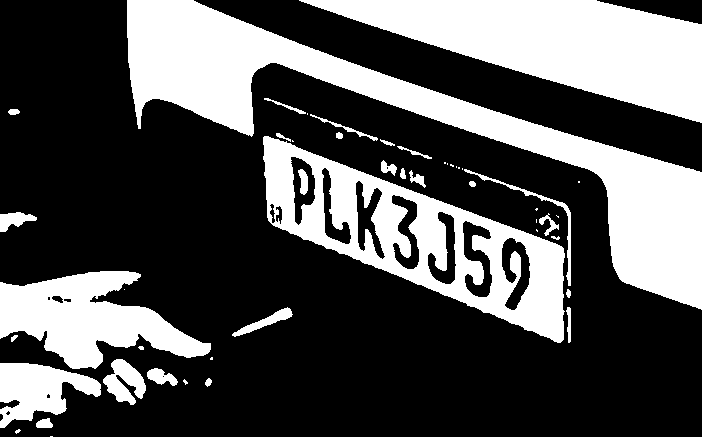

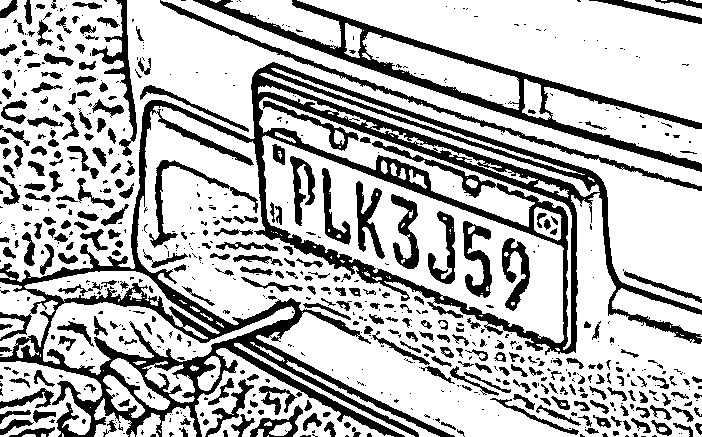

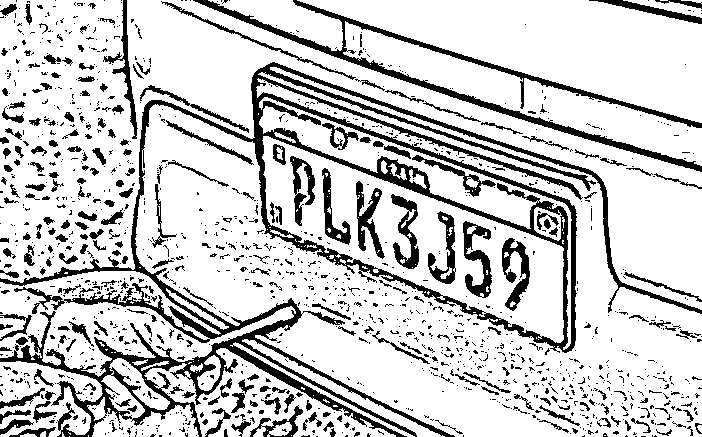

In [271]:
img2 = cv.imread(img_name,0)
th1_2,th2_2,th3_2 = find_threashholds(img2)

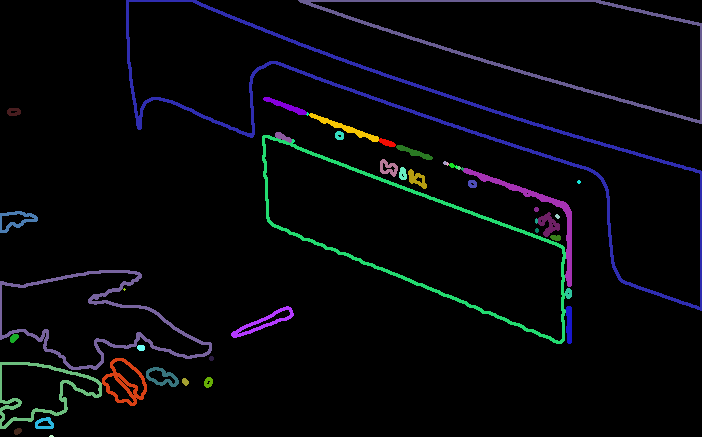

achou 47 contornos


In [272]:
contours_2 = find_contours(th1_2)
print(f"achou {len(contours_2)} contornos")

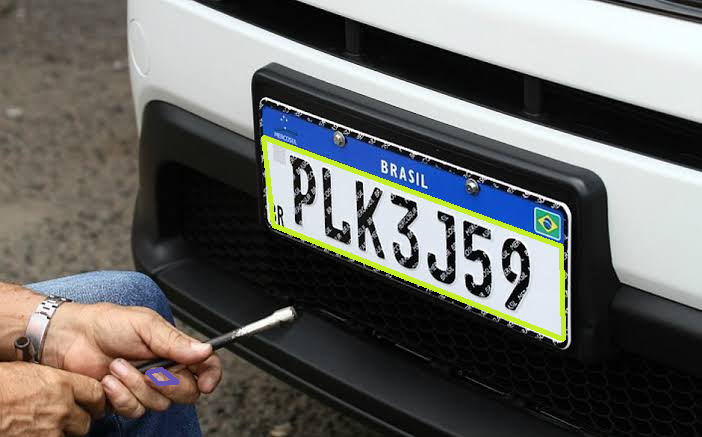

achou 2 retangulos


In [216]:



img_2 = cv.imread(img_name)
rects_2 = find_rects(img_2,contours_2)
print(f"achou {len(rects_2)} retangulos")

(384, 1180)


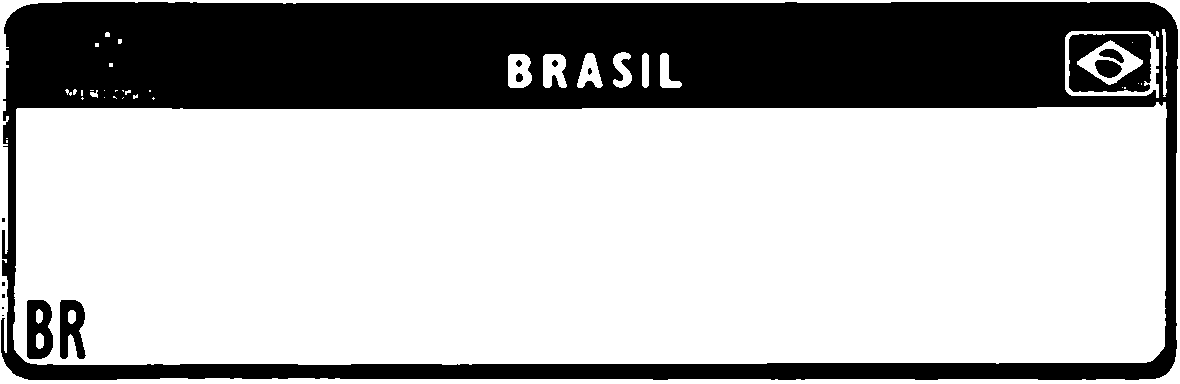

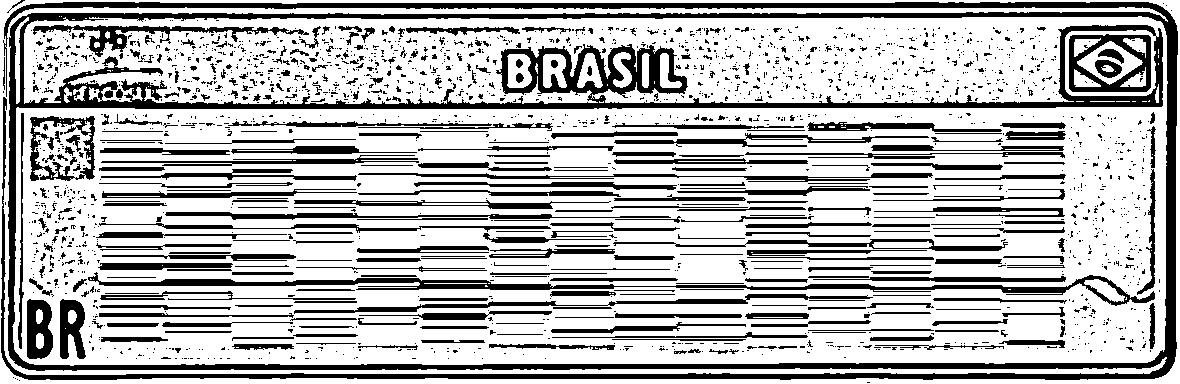

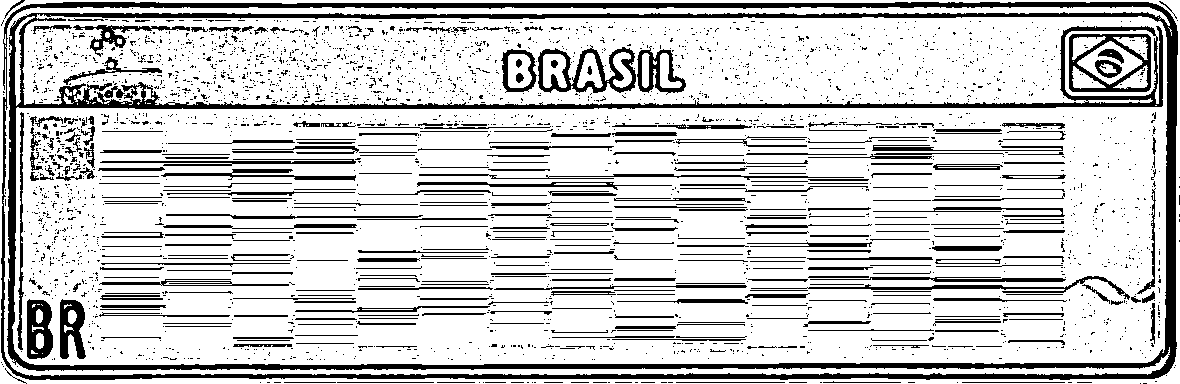

In [136]:
img1 = cv.imread(img_placa,0)
print(img1.shape)
th1_1,th2_1,th3_1 = find_threashholds(img1)

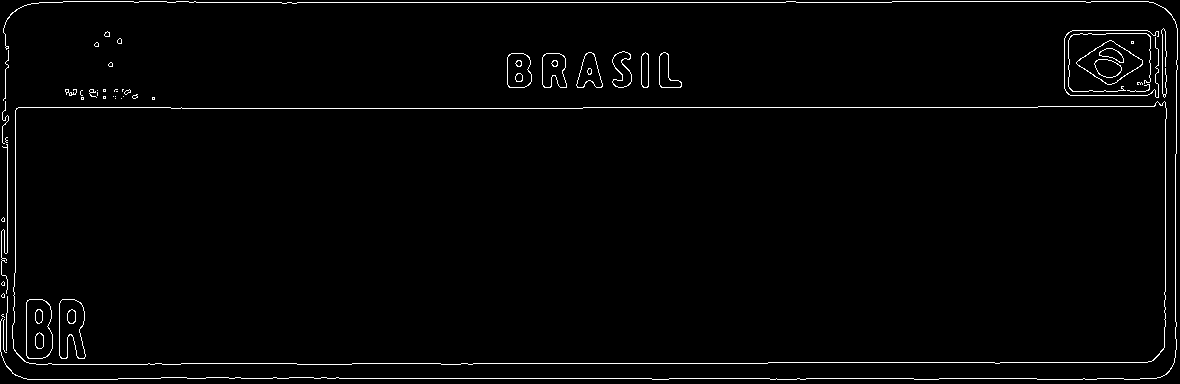

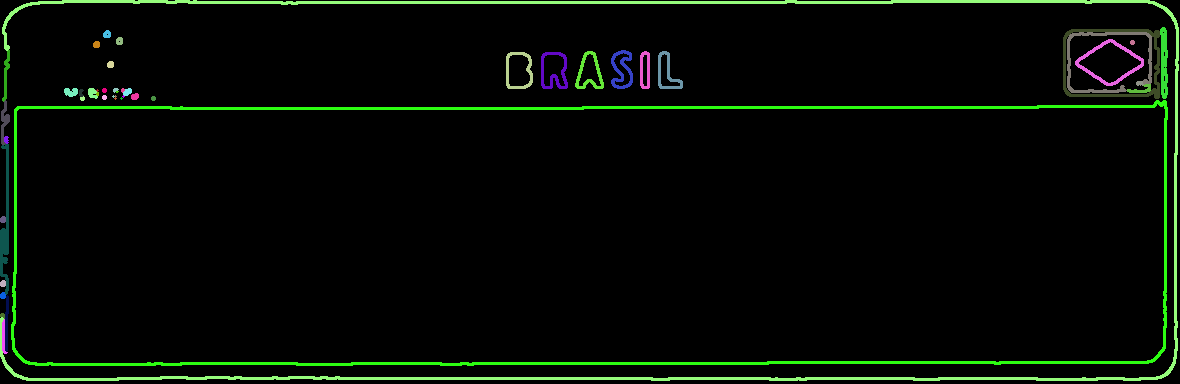

achou 48 contornos


In [133]:
edged1 = cv.Canny(th1_1, 200, 200)
cv2_imshow(edged1)
contours_1 = find_contours(edged1)
print(f"achou {len(contours_1)} contornos")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in arccos


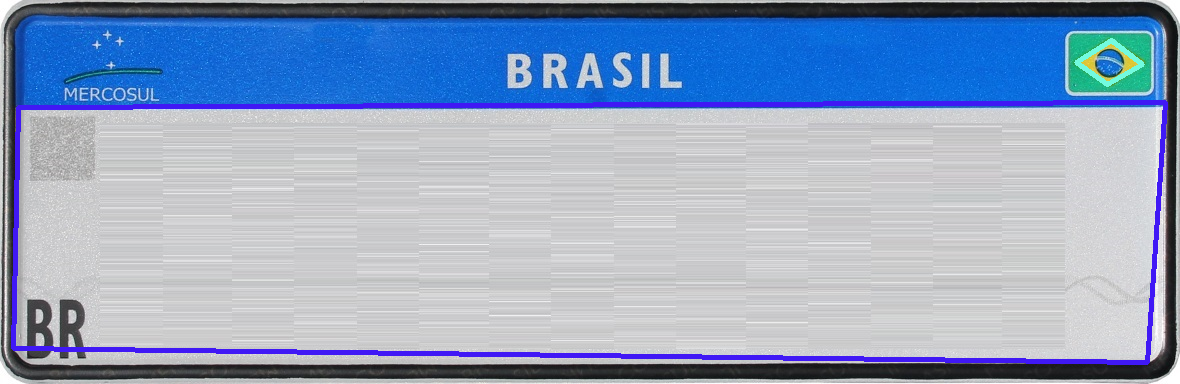

achou 2 retangulos


In [134]:
img_1 = cv.imread(img_placa)
rects_1 = find_rects(img_1,contours_1)
print(f"achou {len(rects_1)} retangulos")

[[[  13  348]]

 [[  18  107]]

 [[1165  102]]

 [[1147  362]]]
[[[  13  362]]

 [[  13  107]]

 [[1165  107]]

 [[1165  362]]]


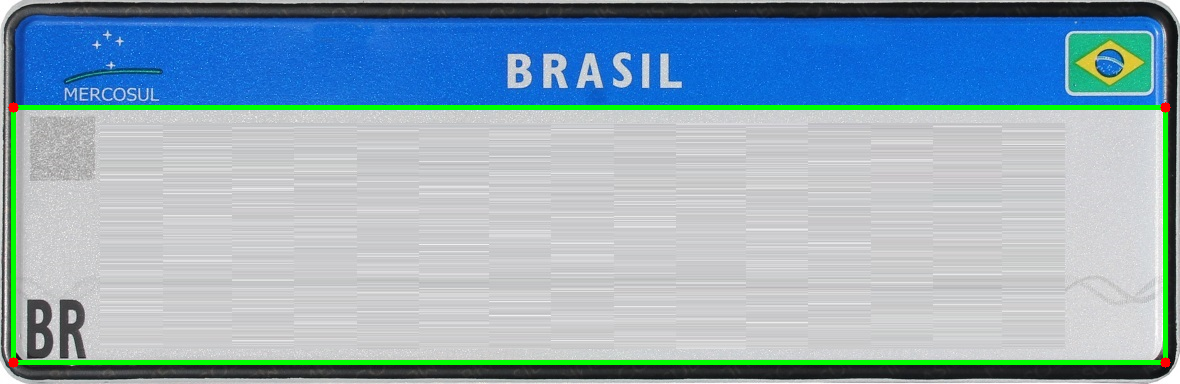

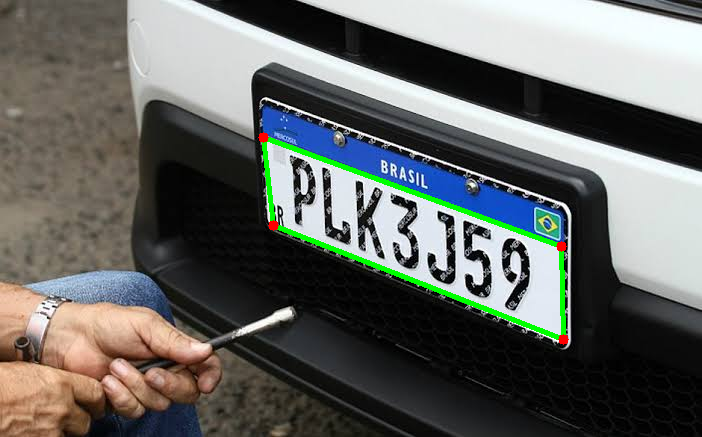

In [229]:
def config_rect(xy):
  if xy[0][0][0] < xy[-1][0][0]:
    xy[-1][0][0] = xy[0][0][0]
  else:
    xy[0][0][0] = xy[-1][0][0]

  if xy[1][0][0] > xy[2][0][0]:
    xy[2][0][0] = xy[1][0][0]
  else:
    xy[1][0][0] = xy[2][0][0]

  if xy[0][0][1] < xy[1][0][1]:
    xy[1][0][1] = xy[0][0][1]
  else:
    xy[0][0][1] = xy[1][0][1]

  if xy[2][0][1] > xy[3][0][1]:
    xy[3][0][1] = xy[2][0][1]
  else:
    xy[2][0][1] = xy[3][0][1]
  return xy

rect_reference = get_biggest(rects_1)
#print(rect_reference.shape)
#print(rect_reference)
rect_reference = order_rect(rect_reference)
#print(rect_reference.shape)
print(rect_reference)

rect_reference = config_rect(rect_reference)
rect_reference = order_rect(rect_reference)
print(rect_reference)

output1 = cv.imread(img_placa)
cv.drawContours(output1, [rect_reference], -1, (0,255,0), 3)
for (point) in rect_reference:
  #print("AAAAAAA")
  #print(x)
  #print(y)
  cv.circle(output1, (int(point[0][0]), int(point[0][1])), 5, (0, 0, 255), -1)
cv2_imshow(output1)

rect_image = get_biggest(rects_2)
rect_image = order_rect(rect_image)

#print(rect_image)

output2 = cv.imread(img_name)
cv.drawContours(output2, [rect_image], -1, (0,255,0), 3)
for (point) in rect_image:
  #print("AAAAAAA")
  #print(x)
  #print(y)
  cv.circle(output2, (int(point[0][0]), int(point[0][1])), 5, (0, 0, 255), -1)
cv2_imshow(output2)


#cv.drawContours(output, [rect_reference], -1, color, 3)
#text = "eps={:.4f}, num_pts={}".format(eps, len(rect_reference))

[<KeyPoint 0x7f645cadb300>, <KeyPoint 0x7f645cadb090>, <KeyPoint 0x7f645cadb540>, <KeyPoint 0x7f645cadb6f0>, <KeyPoint 0x7f645cadb9c0>, <KeyPoint 0x7f645cadb3c0>, <KeyPoint 0x7f645cadb210>, <KeyPoint 0x7f645cadbd50>, <KeyPoint 0x7f645cadb1e0>, <KeyPoint 0x7f645cadb750>, <KeyPoint 0x7f645cadbde0>, <KeyPoint 0x7f645cadb4e0>, <KeyPoint 0x7f645cadbae0>, <KeyPoint 0x7f645cadbcf0>, <KeyPoint 0x7f645cadb9f0>, <KeyPoint 0x7f645cadb900>, <KeyPoint 0x7f645cadb960>, <KeyPoint 0x7f645cadb2a0>, <KeyPoint 0x7f645cadb180>, <KeyPoint 0x7f645cadb690>, <KeyPoint 0x7f645cadbdb0>, <KeyPoint 0x7f645cadb510>, <KeyPoint 0x7f645cadb780>, <KeyPoint 0x7f645cadb1b0>, <KeyPoint 0x7f645c4d0d80>, <KeyPoint 0x7f645c4d06c0>, <KeyPoint 0x7f645c4d0390>, <KeyPoint 0x7f645c4d0630>, <KeyPoint 0x7f645c4d0960>, <KeyPoint 0x7f645c4d0660>, <KeyPoint 0x7f645c4d03c0>, <KeyPoint 0x7f645c4d0ab0>, <KeyPoint 0x7f645c4d06f0>, <KeyPoint 0x7f645c4d0870>, <KeyPoint 0x7f645c4d0330>, <KeyPoint 0x7f645c4d0c00>, <KeyPoint 0x7f645c4d0e10>, 

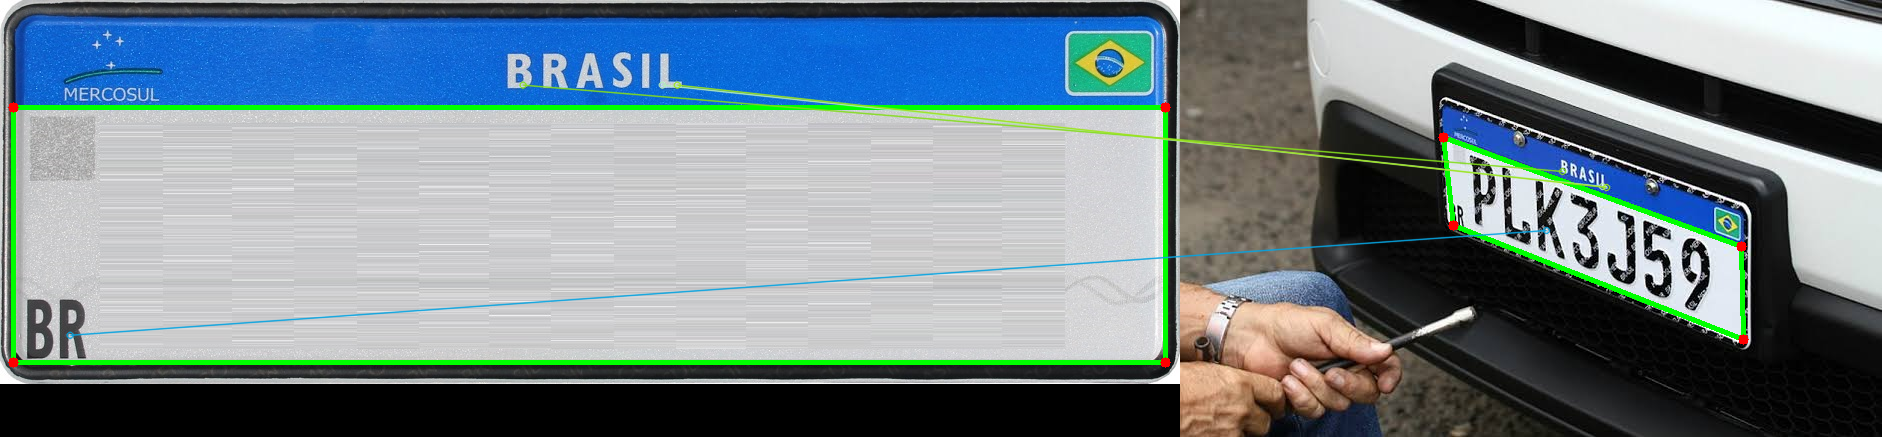

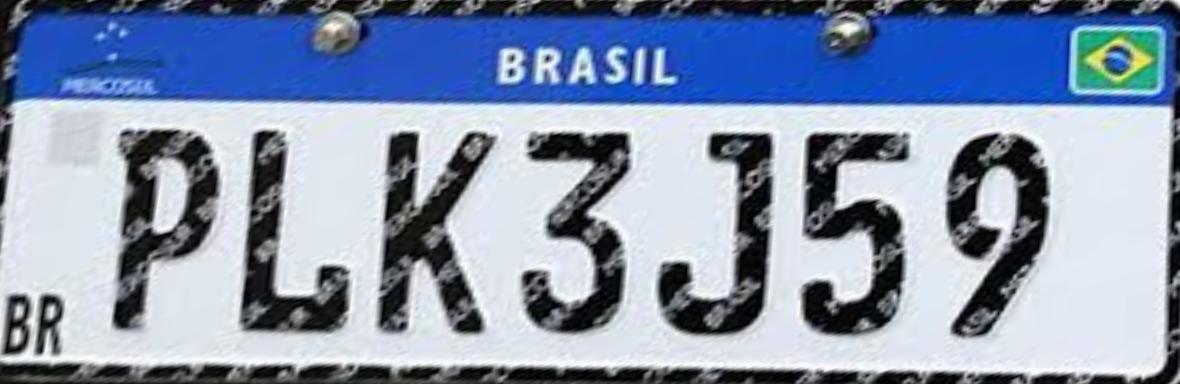

In [248]:
H, status = cv.findHomography(rect_image,rect_reference)

output = cv.imread(img_name)

out = cv.warpPerspective(output, H, (1180,384))

cv2_imshow(out)



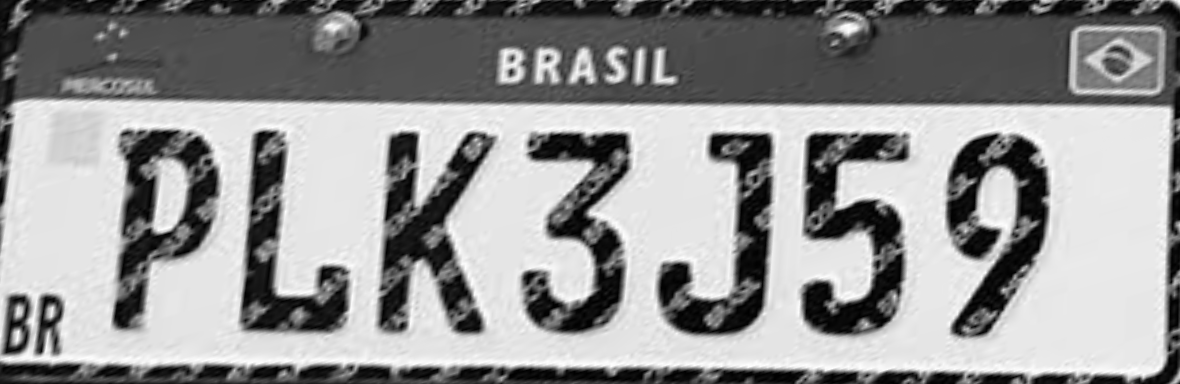

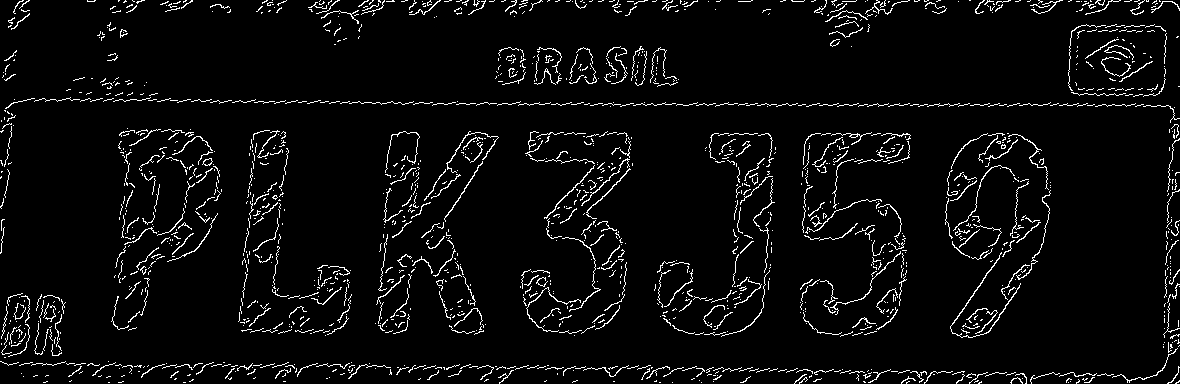

In [253]:
corrected = cv.cvtColor(out,cv.COLOR_BGR2GRAY)
cv2_imshow(corrected)
edged = cv.Canny(corrected, 200, 200)
cv2_imshow(edged)

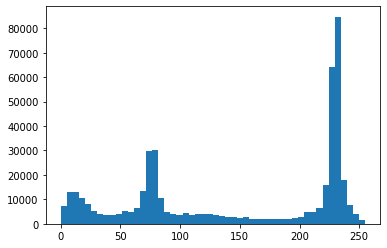

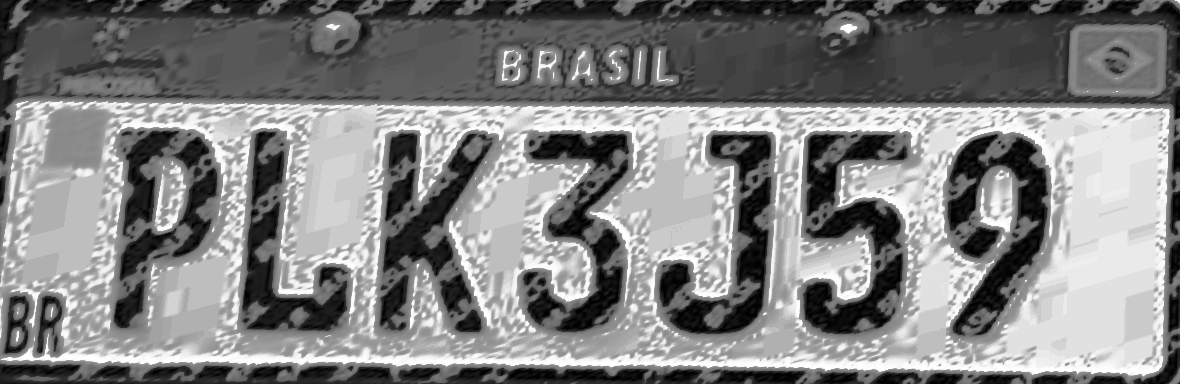

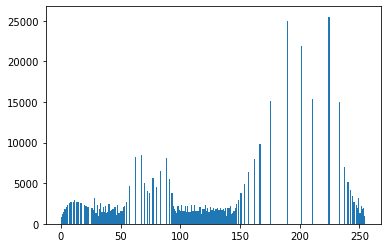

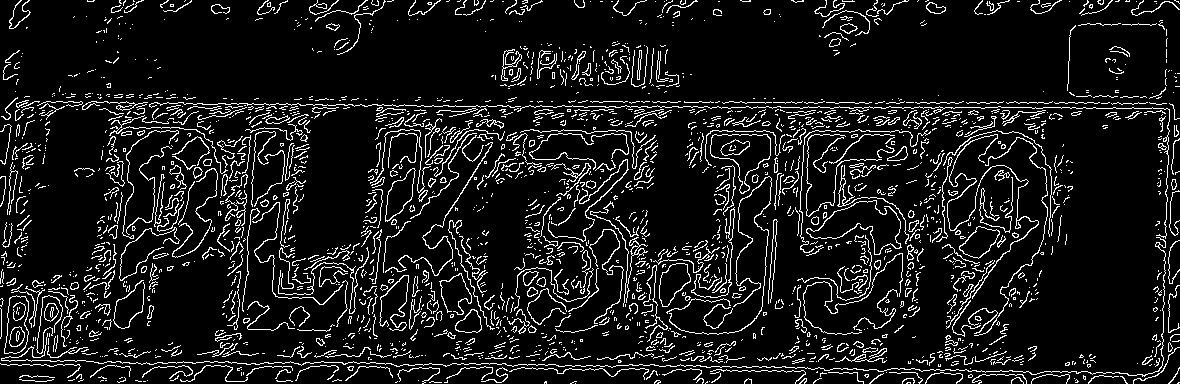

In [254]:
h=plt.hist(corrected.ravel(),bins=50,range=[0,255]) #ravel() transforma a imagem num vetor 1D
plt.show()
imgeq=cv.equalizeHist(corrected)
cv2_imshow(imgeq)
plt.hist(imgeq.ravel(),bins=256,range=[0,255]) 
plt.show()
edged = cv.Canny(imgeq, 200, 200)
cv2_imshow(edged)

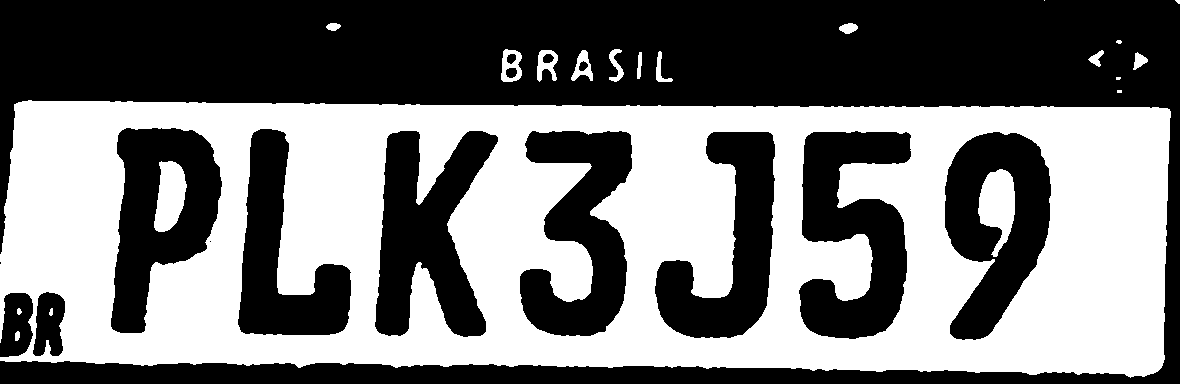

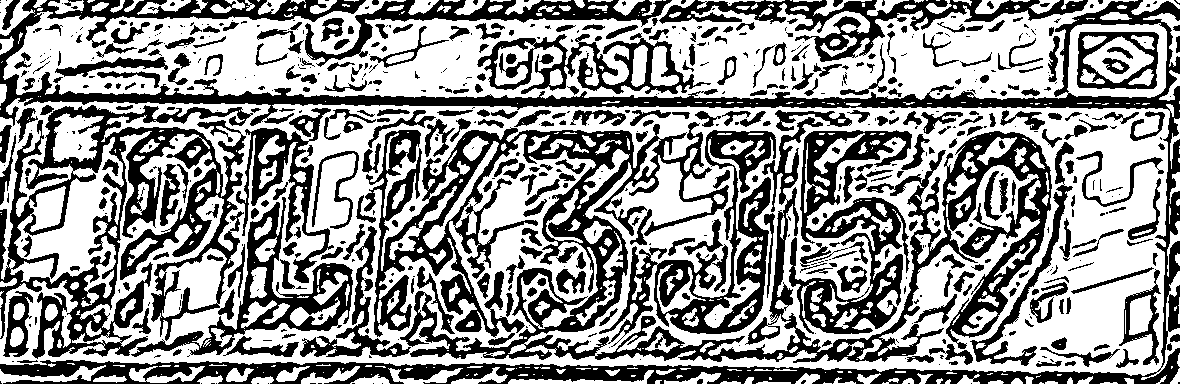

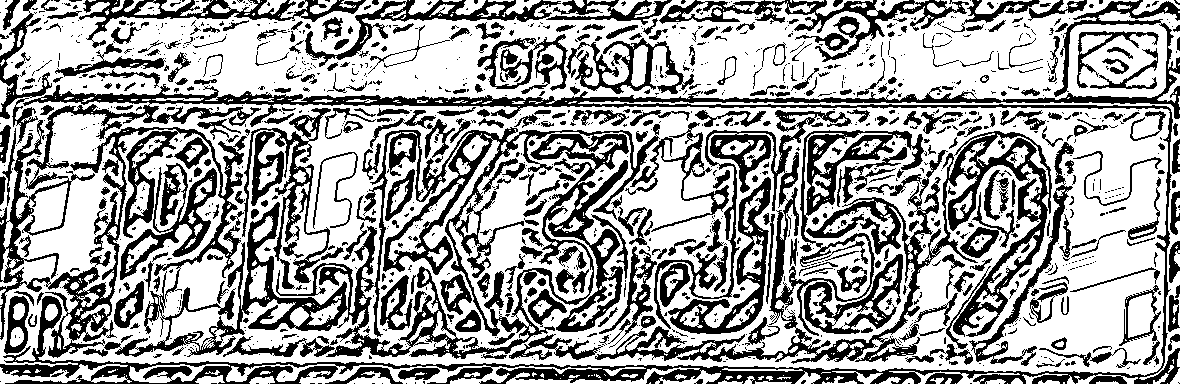

In [255]:

th1,th2,th3 = find_threashholds(imgeq)

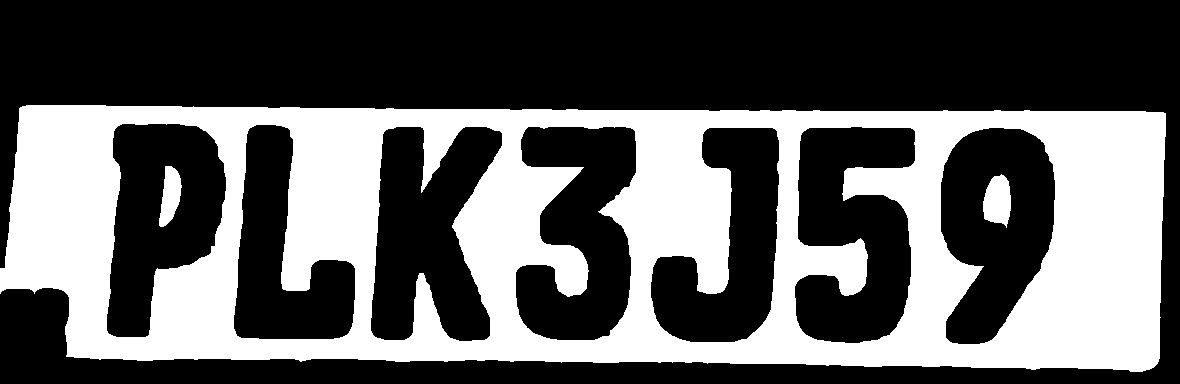

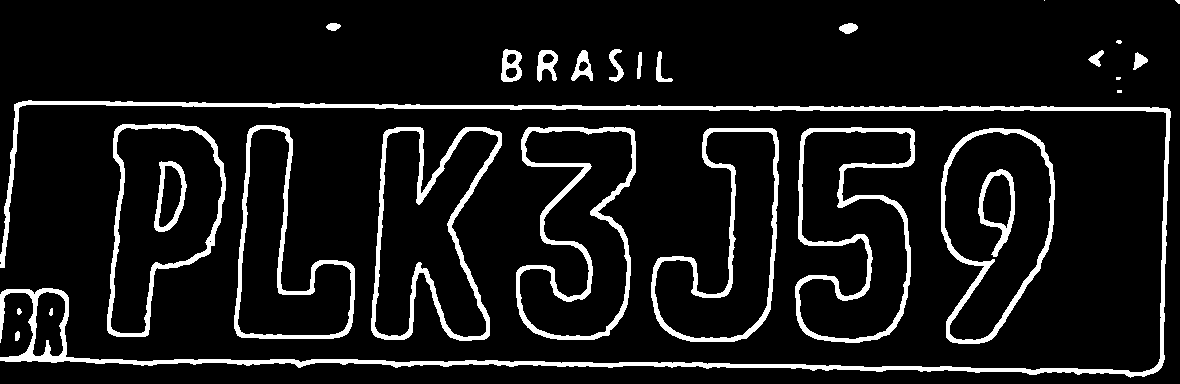

In [260]:
kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(th1,kernel,iterations = 4)
cv2_imshow(erosion)
cont=th1-erosion
cv2_imshow(cont)

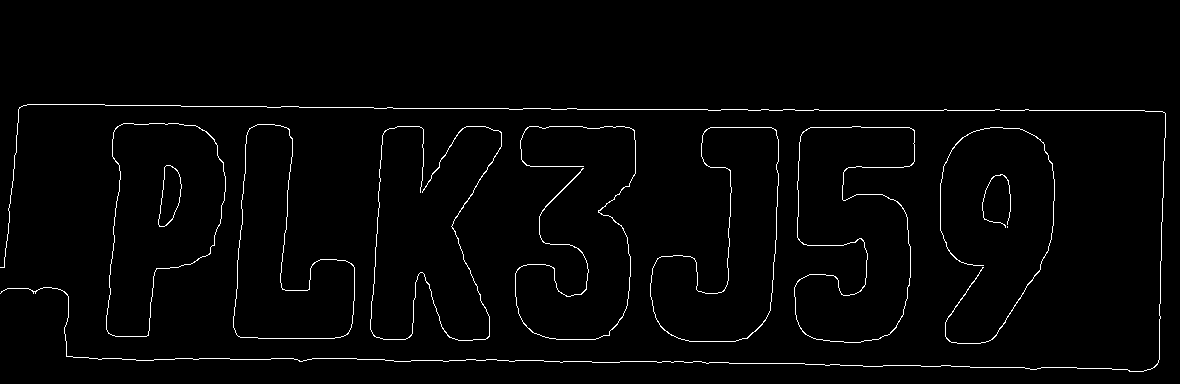

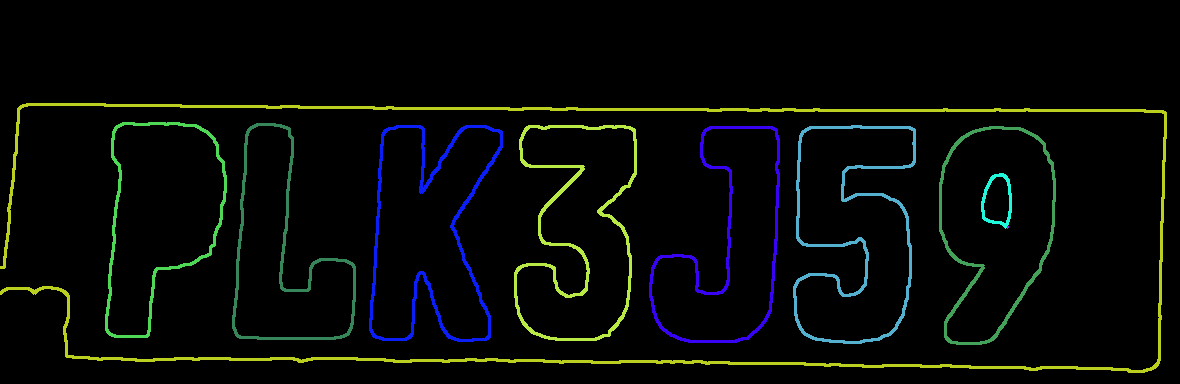

achou 10 contornos


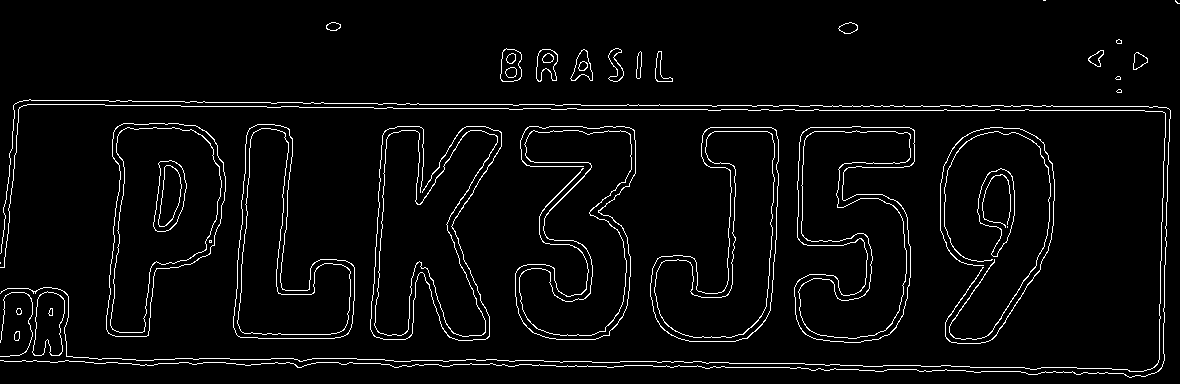

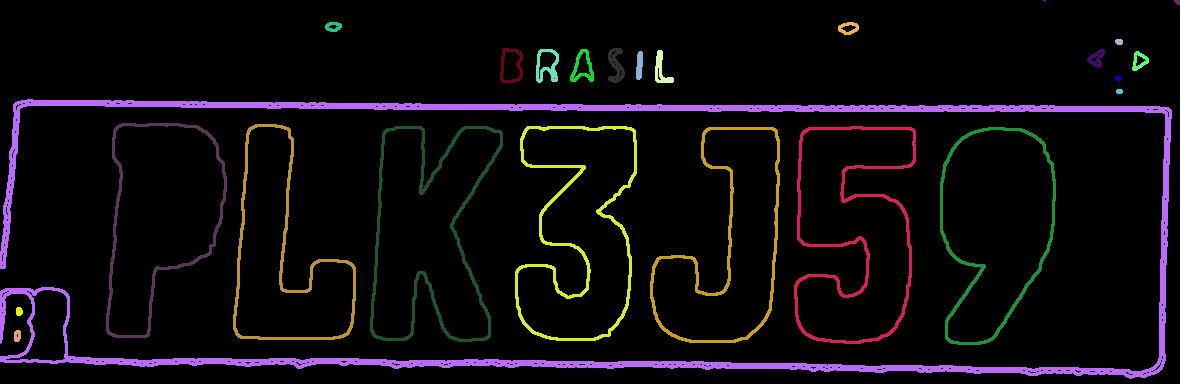

achou 25 contornos


In [268]:
edged = cv.Canny(erosion, 200, 200)
cv2_imshow(edged)
contours = find_contours(edged)
print(f"achou {len(contours)} contornos")

edged = cv.Canny(cont, 200, 200)
cv2_imshow(edged)
contours = find_contours(cont)
print(f"achou {len(contours)} contornos")

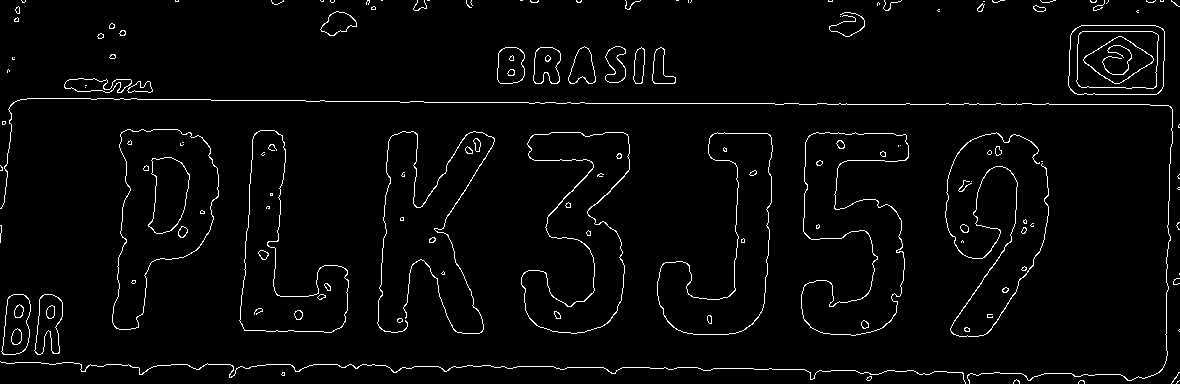

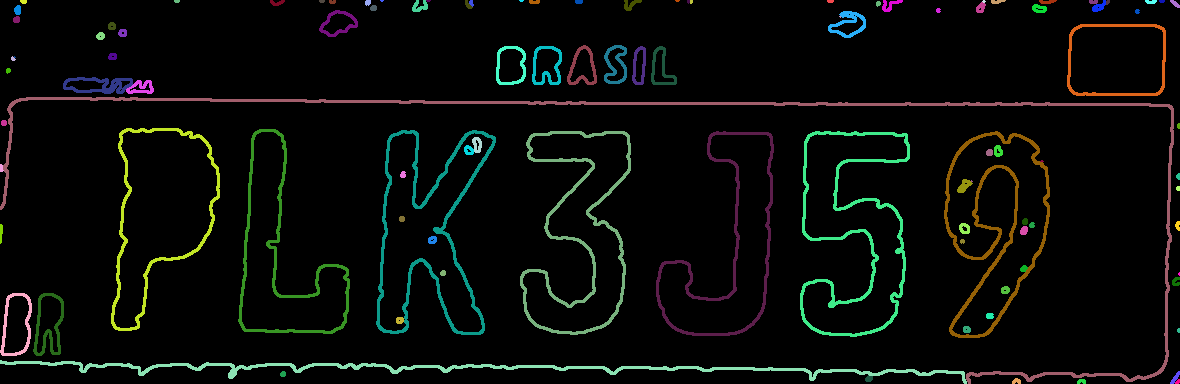

achou 104 contornos


In [246]:
edged = cv.Canny(th1, 200, 200)
cv2_imshow(edged)
contours = find_contours(edged)
print(f"achou {len(contours)} contornos")

In [196]:
"""
cnts = []
drawing2 = np.zeros((th1.shape[0], th1.shape[1], 3), np.uint8)
for i in range(len(contours)):
  hull = cv.convexHull(contours[i])
  simplified_cnt = cv.approxPolyDP(hull,0.001*cv.arcLength(hull,True),True)
  edg_num = len(simplified_cnt)
  if edg_num < 10 and edg_num > 3:
    cnts.append(simplified_cnt)
  cv.drawContours(drawing2, contours, i, color_contours, 1, 8, hierarchy)
  #print("cnt:")
  #print(simplified_cnt)

for i in range(len(cnts)):
  color_contours = (0, 255, 0) # green - color for contours
  color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
  # draw ith contour
  # draw ith convex hull object
  cv.drawContours(drawing2, cnts, i, color, 1, 8)
cv2_imshow(drawing2)
"""

'\ncnts = []\ndrawing2 = np.zeros((th1.shape[0], th1.shape[1], 3), np.uint8)\nfor i in range(len(contours)):\n  hull = cv.convexHull(contours[i])\n  simplified_cnt = cv.approxPolyDP(hull,0.001*cv.arcLength(hull,True),True)\n  edg_num = len(simplified_cnt)\n  if edg_num < 10 and edg_num > 3:\n    cnts.append(simplified_cnt)\n  cv.drawContours(drawing2, contours, i, color_contours, 1, 8, hierarchy)\n  #print("cnt:")\n  #print(simplified_cnt)\n\nfor i in range(len(cnts)):\n  color_contours = (0, 255, 0) # green - color for contours\n  color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))\n  # draw ith contour\n  # draw ith convex hull object\n  cv.drawContours(drawing2, cnts, i, color, 1, 8)\ncv2_imshow(drawing2)\n'

In [77]:


"""
contours,hierarchy = cv.findContours(th1,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)


# create hull array for convex hull points
hull = []



# calculate points for each contour
for i in range(len(contours)):
    # creating convex hull object for each contour
    hull.append(cv.convexHull(contours[i], False))

# create an empty black image
drawing = np.zeros((th1.shape[0], th1.shape[1], 3), np.uint8)

# draw contours and hull points
for i in range(len(contours)):
    print(contours[i])
    color_contours = (0, 255, 0) # green - color for contours
    color = (255, 0, 0) # blue - color for convex hull
    # draw ith contour
    cv.drawContours(drawing, contours, i, color_contours, 1, 8, hierarchy)
    # draw ith convex hull object
    cv.drawContours(drawing, hull, i, color, 1, 8)
cv2_imshow(drawing)

"""

'\ncontours,hierarchy = cv.findContours(th1,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)\n\n\n# create hull array for convex hull points\nhull = []\n\n\n\n# calculate points for each contour\nfor i in range(len(contours)):\n    # creating convex hull object for each contour\n    hull.append(cv.convexHull(contours[i], False))\n\n# create an empty black image\ndrawing = np.zeros((th1.shape[0], th1.shape[1], 3), np.uint8)\n\n# draw contours and hull points\nfor i in range(len(contours)):\n    print(contours[i])\n    color_contours = (0, 255, 0) # green - color for contours\n    color = (255, 0, 0) # blue - color for convex hull\n    # draw ith contour\n    cv.drawContours(drawing, contours, i, color_contours, 1, 8, hierarchy)\n    # draw ith convex hull object\n    cv.drawContours(drawing, hull, i, color, 1, 8)\ncv2_imshow(drawing)\n\n'

In [198]:
"""
img = cv.imread('vehicle_blank.jpg',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

cv2_imshow(th1)
cv2_imshow(th2)
cv2_imshow(th3)
"""

"\nimg = cv.imread('vehicle_blank.jpg',0)\nimg = cv.medianBlur(img,5)\nret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)\nth2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,            cv.THRESH_BINARY,11,2)\nth3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,            cv.THRESH_BINARY,11,2)\n\ncv2_imshow(th1)\ncv2_imshow(th2)\ncv2_imshow(th3)\n"

In [203]:
"""
img1 = cv.cvtColor(cv.imread('placa_carro_blank.jpg'), cv.COLOR_BGR2GRAY)
edges1 = cv.Canny(img1,100,200)
cv2_imshow(img1)
cv2_imshow(edges1)

edges1 = cv.Canny(img1,150,200)
cv2_imshow(edges1)

img2 = cv.cvtColor(cv.imread('placa_de_carroII.jpg'), cv.COLOR_BGR2GRAY)
edges2 = cv.Canny(img2,100,200)
cv2_imshow(img2)
cv2_imshow(edges2)

edges = cv.Canny(img2,150,200)
cv2_imshow(edges2)
"""

"\nimg1 = cv.cvtColor(cv.imread('placa_carro_blank.jpg'), cv.COLOR_BGR2GRAY)\nedges1 = cv.Canny(img1,100,200)\ncv2_imshow(img1)\ncv2_imshow(edges1)\n\nedges1 = cv.Canny(img1,150,200)\ncv2_imshow(edges1)\n\nimg2 = cv.cvtColor(cv.imread('placa_de_carroII.jpg'), cv.COLOR_BGR2GRAY)\nedges2 = cv.Canny(img2,100,200)\ncv2_imshow(img2)\ncv2_imshow(edges2)\n\nedges = cv.Canny(img2,150,200)\ncv2_imshow(edges2)\n"

(440, 32)
(500, 32)


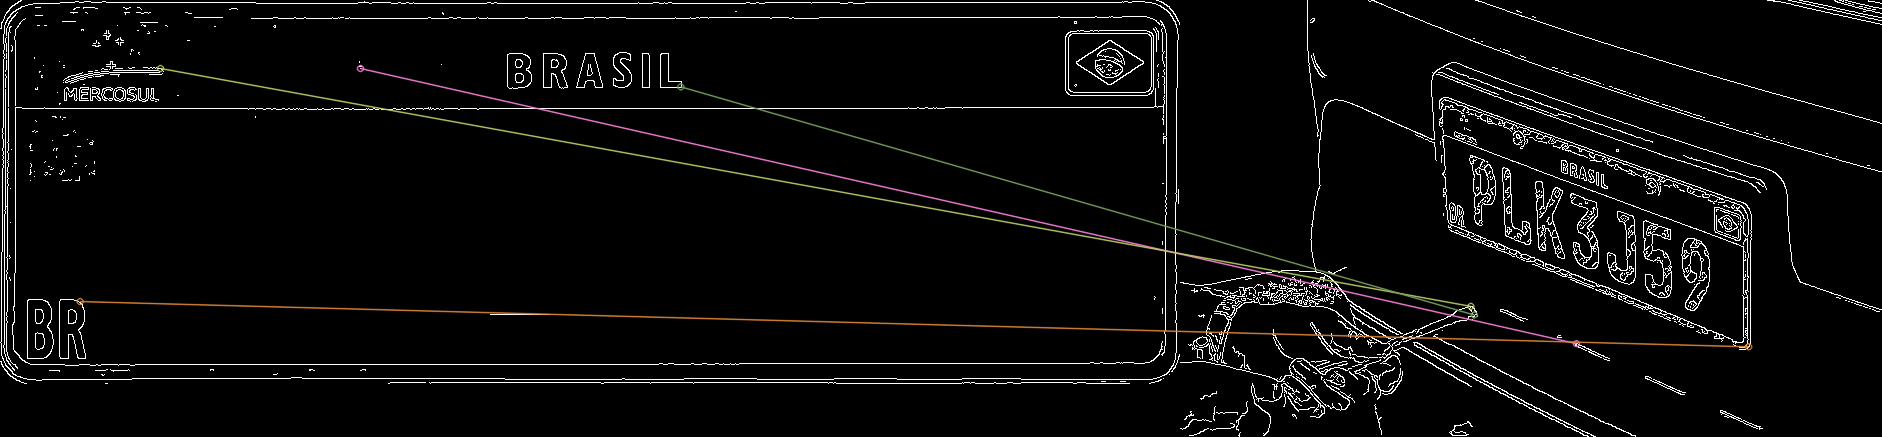

In [ ]:
"""
orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(edges1,None)
kp2, des2 = orb.detectAndCompute(edges2,None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

print(des1.shape)
print(des2.shape)

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv.drawMatches(edges1,kp1,edges2,kp2,matches[:4],None, flags=2)

cv2_imshow(img3)
"""

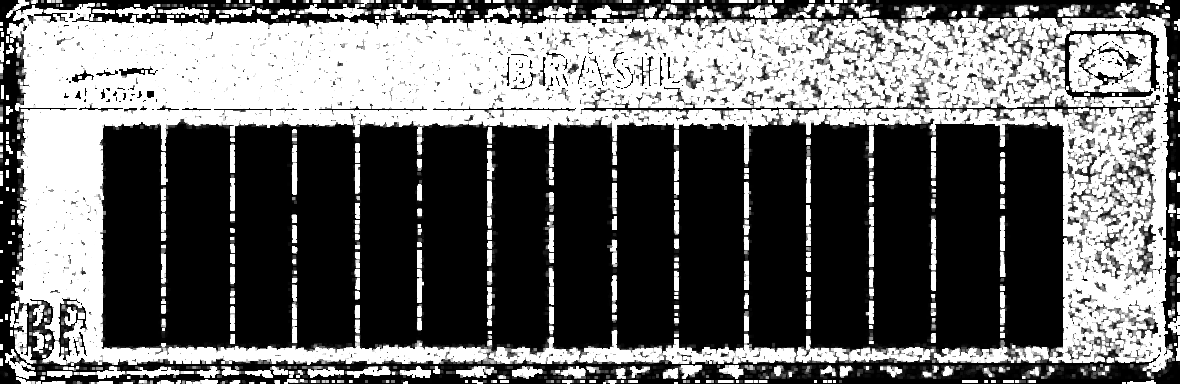

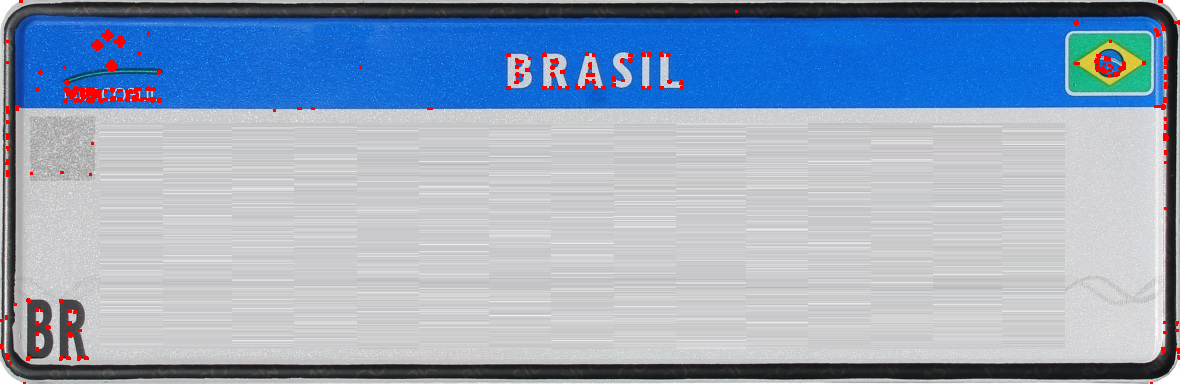

In [ ]:
"""
filename = 'placa_carro_blank.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04) #Documentação: https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345
dst = cv.dilate(dst,None)
cv2_imshow(dst)
print("")
img[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(img)
"""

In [199]:
"""

orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

print(des1.shape)
print(des2.shape)

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:4],None, flags=2)

cv2_imshow(img3)
"""

'\n\norb = cv.ORB_create()\nkp1, des1 = orb.detectAndCompute(img1,None)\nkp2, des2 = orb.detectAndCompute(img2,None)\nbf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)\n\nprint(des1.shape)\nprint(des2.shape)\n\nmatches = bf.match(des1,des2)\nmatches = sorted(matches, key = lambda x:x.distance)\nimg3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:4],None, flags=2)\n\ncv2_imshow(img3)\n'

(388, 32)
(493, 32)


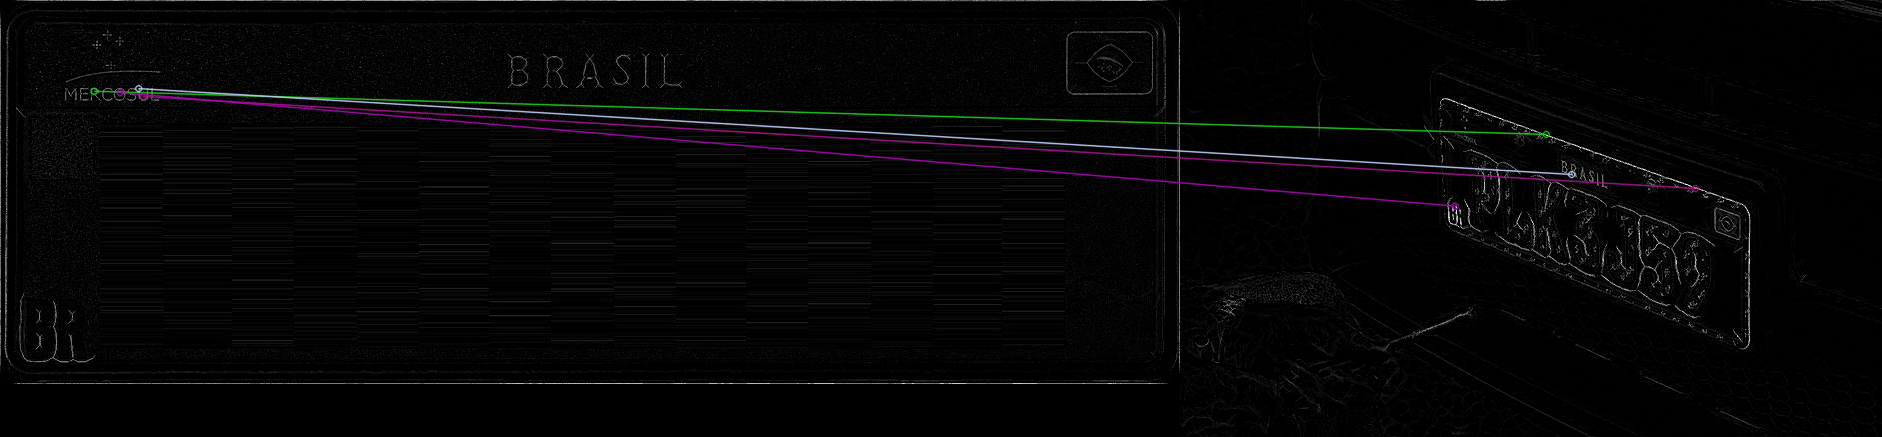

In [ ]:
def enigma(img):
    img = img.copy() 
    skel = img.copy()

    skel[:,:] = 0
    kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))

    for i in range(10):
        eroded = cv.morphologyEx(img, cv.MORPH_ERODE, kernel)
        temp = cv.morphologyEx(eroded, cv.MORPH_DILATE, kernel)
        temp  = cv.subtract(img, temp)
        skel = cv.bitwise_or(skel, temp)
        img[:,:] = eroded[:,:]
    return skel
imm1 = enigma(img1)
imm2 = enigma(img2)
#cv2_imshow()

orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(imm1,None)
kp2, des2 = orb.detectAndCompute(imm2,None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

print(des1.shape)
print(des2.shape)

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
imm3 = cv.drawMatches(imm1,kp1,imm2,kp2,matches[:4],None, flags=2)

cv2_imshow(imm3)

In [200]:
"""
# pontos 3D (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

objpoints = [] # pontos 3D dos objetos
imgpoints = [] # pontos 3D das imagens

images = ['vehicle_blank.jpg','placa_de_carroII.jpg']

cornerss = np.zeros((2, 4, 1, 2))
i=0
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

    # Encontra 42 (7x6) corners no tabuleiro de xadrez
    ret, corners = cv.findChessboardCorners(gray, (7,6),None)
    cv2_imshow(img)
    #print(np.size(corners))
    #print(corners.shape)
    print(corners)
    corners = np.array([corners[0],corners[6],corners[-7],corners[-1]])
    cornerss[i] = corners
    #print(cornerss[i].shape)

    
    i+=1

    # Caso encontrados, adiciona pontos 3D e 2D nas listas objpoints e imgpoints
    # com refinamento da busca
    if ret == True:
        objpoints.append(objp)
        # critério de término de busca
        criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        corners2 = cv.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Desenha e mostra os corners nas diversas imagens
        img = cv.drawChessboardCorners(img, (7,6), corners2,ret)
        cv2_imshow(img)

print(cornerss.shape)
H, status = cv.findHomography(cornerss[0], cornerss[1])

esquerda = cv.imread('esquerda.png')

out = cv.warpPerspective(esquerda, H, (895,668))

cv2_imshow(out)
"""

"\n# pontos 3D (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)\nobjp = np.zeros((6*7,3), np.float32)\nobjp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)\n\nobjpoints = [] # pontos 3D dos objetos\nimgpoints = [] # pontos 3D das imagens\n\nimages = ['vehicle_blank.jpg','placa_de_carroII.jpg']\n\ncornerss = np.zeros((2, 4, 1, 2))\ni=0\nfor fname in images:\n    img = cv.imread(fname)\n    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)\n\n    # Encontra 42 (7x6) corners no tabuleiro de xadrez\n    ret, corners = cv.findChessboardCorners(gray, (7,6),None)\n    cv2_imshow(img)\n    #print(np.size(corners))\n    #print(corners.shape)\n    print(corners)\n    corners = np.array([corners[0],corners[6],corners[-7],corners[-1]])\n    cornerss[i] = corners\n    #print(cornerss[i].shape)\n\n    \n    i+=1\n\n    # Caso encontrados, adiciona pontos 3D e 2D nas listas objpoints e imgpoints\n    # com refinamento da busca\n    if ret == True:\n        objpoints.append(objp)\n        # critério de término de busca\n    

In [202]:
"""
img = cv.imread("placa_de_carroII.jpg", -1)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

binary = cv.bitwise_not(gray)

contours,hierarchy = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

for contour in contours:
    (x,y,w,h) = cv.boundingRect(contour)
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

cv2_imshow(img)

"""

'\nimg = cv.imread("placa_de_carroII.jpg", -1)\n\ngray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)\n\nbinary = cv.bitwise_not(gray)\n\ncontours,hierarchy = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)\n\nfor contour in contours:\n    (x,y,w,h) = cv.boundingRect(contour)\n    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)\n\ncv2_imshow(img)\n\n'

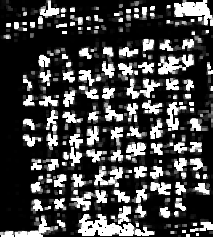

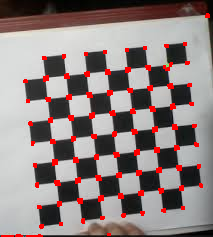

**EXERCÍCIO**

Utilizando Morfologia Matemática, melhore a qualidade dos corners detectados pelo algoritmo acima.

In [ ]:
import numpy as np
filename = 'chess.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04) #Documentação: https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345
dst = cv.dilate(dst,None)
cv2_imshow(dst)
print("")
img[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(img)

In [201]:
      """
      a = math.sqrt( ((approx[p-1][0][0] - approx[p][0][0])**2) + ((approx[p-1][0][1] - approx[p][0][1])**2) )

      #a = approx[p-1][0][0] - approx[p][0][0], approx[p-1][0][1] - approx[p-1][0][1]
      if p != len(approx)-1:
        #angle = np.angle(square[p-1]-square[p],square[p+1]-square[p])
        #b = approx[p][0][0] - approx[p+1][0][0], approx[p][0][1] - approx[p+1][0][1]
        b = math.sqrt( ((approx[p][0][0] - approx[p+1][0][0])**2) + ((approx[p][0][1] - approx[p+1][0][1])**2) )
        #c = approx[p-1][0][0] - approx[p+1][0][0], approx[p-1][0][1] - approx[p+1][0][1]
        c = math.sqrt(  ((approx[p-1][0][0] - approx[p+1][0][0])**2) + ((approx[p-1][0][1] - approx[p+1][0][1])**2) )
      else:
        #b = approx[p-1][0][0] - approx[-1][0][0], approx[p-1][0][1] - approx[-1][0][1]
        #c = approx[p-1][0][0] - approx[-1][0][0], approx[p-1][0][1] - approx[-1][0][1]
        b = math.sqrt( ((approx[p][0][0] - approx[-1][0][0])**2) + ((approx[p][0][1] - approx[-1][0][1])**2) )
        c = math.sqrt(  ((approx[p-1][0][0] - approx[-1][0][0])**2) + ((approx[p-1][0][1] - approx[-1][0][1])**2) )
        #angle = np.angle(square[p-1]-square[p],square[-1]-square[p])

      angle = np.arccos( (a**2+b**2-c**2) / 2*a*b )
      print(angle)
      """

'\na = math.sqrt( ((approx[p-1][0][0] - approx[p][0][0])**2) + ((approx[p-1][0][1] - approx[p][0][1])**2) )\n\n#a = approx[p-1][0][0] - approx[p][0][0], approx[p-1][0][1] - approx[p-1][0][1]\nif p != len(approx)-1:\n  #angle = np.angle(square[p-1]-square[p],square[p+1]-square[p])\n  #b = approx[p][0][0] - approx[p+1][0][0], approx[p][0][1] - approx[p+1][0][1]\n  b = math.sqrt( ((approx[p][0][0] - approx[p+1][0][0])**2) + ((approx[p][0][1] - approx[p+1][0][1])**2) )\n  #c = approx[p-1][0][0] - approx[p+1][0][0], approx[p-1][0][1] - approx[p+1][0][1]\n  c = math.sqrt(  ((approx[p-1][0][0] - approx[p+1][0][0])**2) + ((approx[p-1][0][1] - approx[p+1][0][1])**2) )\nelse:\n  #b = approx[p-1][0][0] - approx[-1][0][0], approx[p-1][0][1] - approx[-1][0][1]\n  #c = approx[p-1][0][0] - approx[-1][0][0], approx[p-1][0][1] - approx[-1][0][1]\n  b = math.sqrt( ((approx[p][0][0] - approx[-1][0][0])**2) + ((approx[p][0][1] - approx[-1][0][1])**2) )\n  c = math.sqrt(  ((approx[p-1][0][0] - approx[-1][0